In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree



In [22]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

# Drop the 'Id' column
X = train.drop(columns=["log_pSat_Pa", "ID", "parentspecies"])
y = train["log_pSat_Pa"]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=75)


In [ ]:
# Build Random Forest model (RF)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(train_x, train_y)
rf_pred = rf.predict(test_x)

# Evaluate the model
mse = mean_squared_error(test_y, rf_pred)
mae = mean_absolute_error(test_y, rf_pred)
r2 = r2_score(test_y, rf_pred)
print(f"Random Forest: mse={mse}, mae={mae}, r2={r2}")



Random Forest: mse=2.7996110405413432, mae=1.2227210746414572, r2=0.7086923112321066


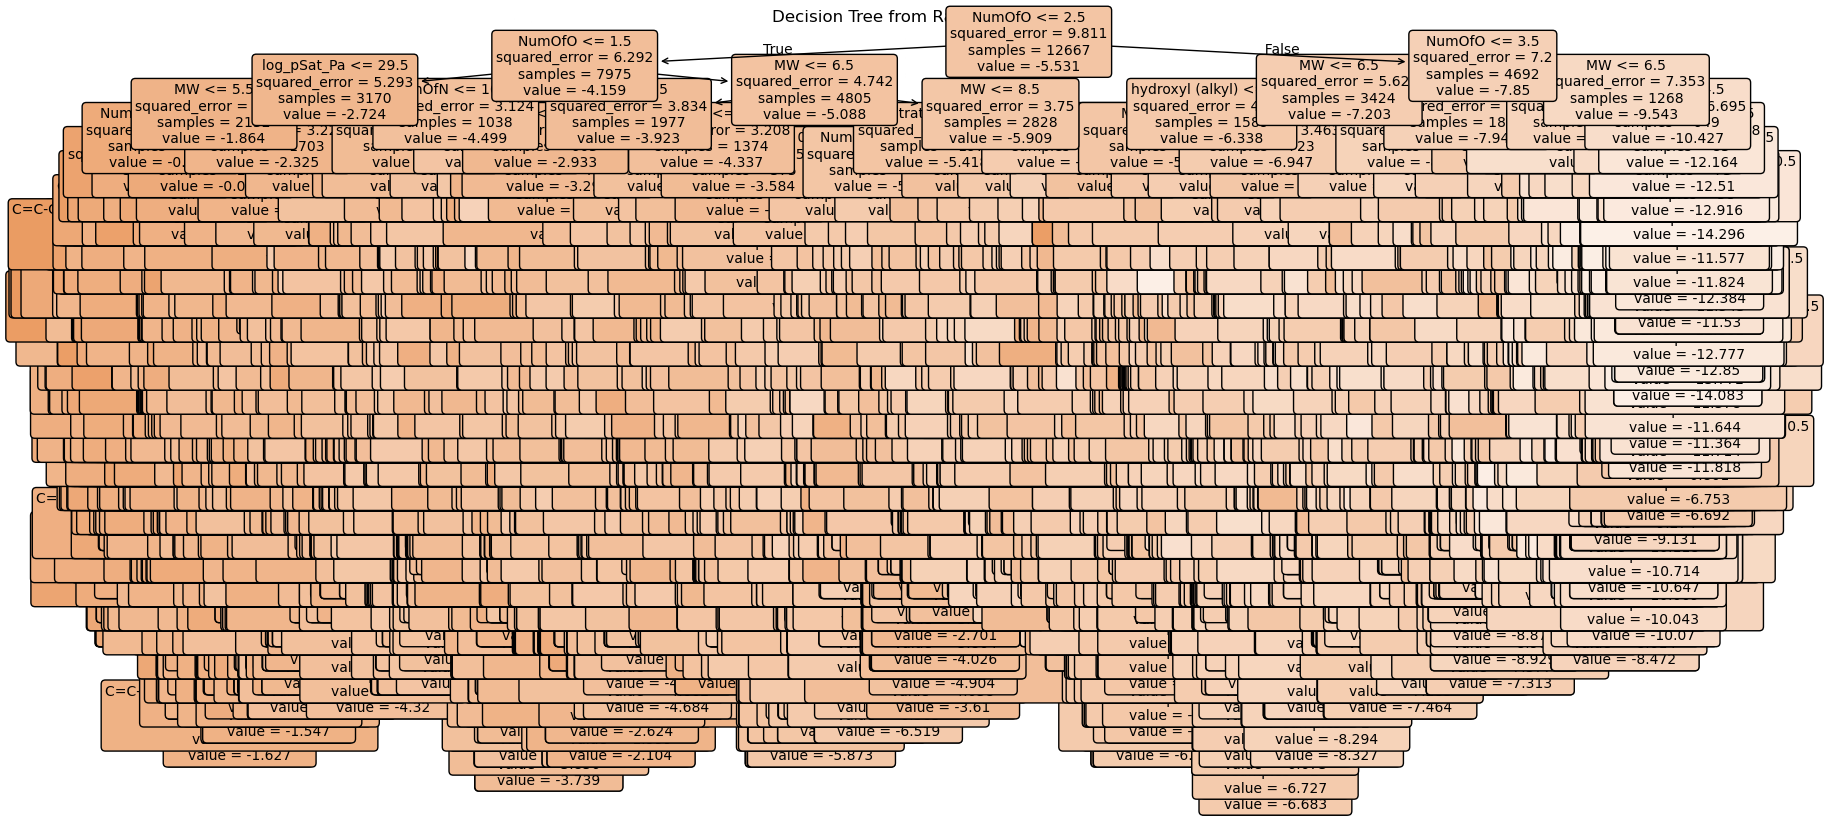

In [7]:
tree_to_plot = rf.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=train.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [9]:
# predict the test data and store the predictions in new col TARGET Column , save new csv with ID and TARGET columns
if "TARGET" in test.columns:
    test = test.drop(columns=["TARGET"])
test["TARGET"] = rf.predict(test.drop(columns=["ID", "parentspecies"]))

# save the ID and TArGET columns to a csv file called : optana_lgbm.csv
test[["ID", "TARGET"]].to_csv("rf_barebone.csv", index=False)

# Lets try with some hp tuning

In [ ]:
# lets try to tune the hyperparameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# optimize the hyperparameters
rf2_model = RandomForestRegressor(random_state=42)
rf2_grid = RandomizedSearchCV(estimator=rf2_model, param_distributions=rf_param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf2_grid.fit(train_x, train_y)
print(rf2_grid.best_params_)
print(rf2_grid.best_score_)
print(rf2_grid.best_estimator_)
print(rf2_grid.cv_results_)

# test model with best hyperparameters
rf2_grid_pred = rf2_grid.predict(test_x)
mse = mean_squared_error(test_y, rf2_grid_pred)
mae = mean_absolute_error(test_y, rf2_grid_pred)
r2 = r2_score(test_y, rf2_grid_pred)
print(f"Random Forest: mse={mse}, mae={mae}, r2={r2}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  12.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  13.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  13.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  13.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  13.9s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  27.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  28.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  16.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  30.4s
[CV] END max_dep

/home/saavajuu/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  53.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  16.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  17.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  18.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  13.1s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  15.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  10.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  13.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; tot

In [25]:
rf2_grid_pred = rf2_grid.predict(test_x)
mse = mean_squared_error(test_y, rf2_grid_pred)
mae = mean_absolute_error(test_y, rf2_grid_pred)
r2 = r2_score(test_y, rf2_grid_pred)
print(f"Random Forest: mse={mse}, mae={mae}, r2={r2}")

Random Forest: mse=2.6852439475564944, mae=1.2004996215419972, r2=0.7205925406018541


In [ ]:
# test the grid search model
if "TARGET" in test.columns:
    test = test.drop(columns=["TARGET"])
test["TARGET"] = rf2_grid.predict(test.drop(columns=["ID", "parentspecies"]))
test[["ID", "TARGET"]].to_csv("rf_gridsearch.csv", index=False)

